In [24]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

In [25]:
%matplotlib inline
rcParams['figure.figsize'] = 12, 8

In [26]:
import seaborn as sns
sns.set_style('whitegrid')
from collections import Counter

#### (Multiple) linear regression on the enrollment data

In [27]:
address = '../Data/enrollment_forecast.csv'

enroll = pd.read_csv(address)
enroll.columns = ['year', 'roll', 'unem', 'hgrad', 'inc']
enroll.head()

,year,roll,unem,hgrad,inc
0,1,5501,8.1,9552,1923
1,2,5945,7.0,9680,1961
2,3,6629,7.3,9731,1979
3,4,7556,7.5,11666,2030
4,5,8716,7.0,14675,2112


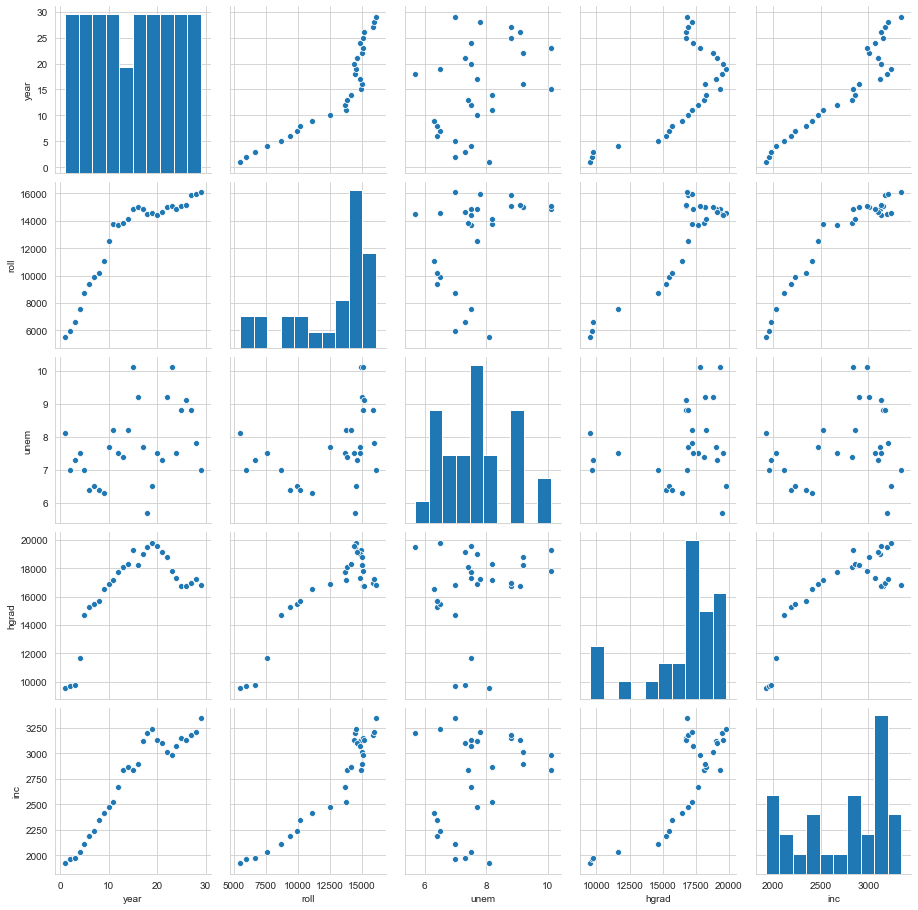

In [28]:
sb.pairplot(enroll)

In [29]:
print(enroll.corr())

           year      roll      unem     hgrad       inc
year   1.000000  0.900934  0.378305  0.670300  0.944287
roll   0.900934  1.000000  0.391344  0.890294  0.949876
unem   0.378305  0.391344  1.000000  0.177376  0.282310
hgrad  0.670300  0.890294  0.177376  1.000000  0.820089
inc    0.944287  0.949876  0.282310  0.820089  1.000000


In [30]:
enroll_data = enroll[['unem', 'hgrad']].values

enroll_target = enroll[['roll']].values

enroll_data_names = ['unem', 'hgrad']

X, y = scale(enroll_data), enroll_target

In [31]:
X[:5]

array([[ 0.34682081, -2.42562243],
       [-0.64989846, -2.38111647],
       [-0.37806593, -2.36338363],
       [-0.19684425, -1.69057879],
       [-0.64989846, -0.64434118]])

In [32]:
y[:5]

array([[5501],
       [5945],
       [6629],
       [7556],
       [8716]], dtype=int64)

### Checking for missing values

In [33]:
missing_values = X==np.NAN
X[missing_values == True]

array([], dtype=float64)

In [34]:
LinReg = LinearRegression(normalize=True)

LinReg.fit(X, y)

print(LinReg.score(X, y))

0.8488812666133723
